# L2 - Multilayer perceptron

### Papers
1. [TensorFlow](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45166.pdf)

### TensorFlow
1. [Installing TensorFlow](https://www.tensorflow.org/install/)
2. [Basics of TensorFlow](https://www.tensorflow.org/get_started/get_started)
3. [Mnist with TensorFlow](https://www.tensorflow.org/get_started/mnist/pros)
4. [TensorFlow Mechanics](https://www.tensorflow.org/get_started/mnist/mechanics)
5. [Visualization](https://www.tensorflow.org/get_started/graph_viz)


### One more thing
1. [Jupyter tutorial](https://habrahabr.ru/company/wunderfund/blog/316826/)
2. [Plot.ly](https://plot.ly/python/)
3. [Widgets](http://jupyter.org/widgets.html)

### 1. Linear multi-classification problem

We have already learned binary linear classifier
$$y = \text{sign}(w^Tx).$$
There are [several approaches](https://en.wikipedia.org/wiki/Multiclass_classification) to solve the problem of multi-class classification. For example [reduction](https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary) of problem to binary classifier or [modification](https://en.wikipedia.org/wiki/Support_vector_machine#Multiclass_SVM) of the known model. However we are interested in approaches that is applied in neural networks.

For each class $c \in 1, \dots, |C|$ we have an individual row $w_i$ of matrix $W$. Then the probability of $x$ belonging to a particular class is equal to
$$p_i = \frac{\exp(w^T_ix)}{\sum_j \exp(w^T_jx)}.$$
This is nothing, but [softmax](https://en.wikipedia.org/wiki/Softmax_function) function of $Wx$.
$$(p_1, \dots, p_{|C|}) = \text{softmax}(Wx).$$

If you look closely, $\text{softmax}$ is a more general variant of sigmoid. To see this, it suffices to consider the case $|C|=2$. As usual the training can be reduced to minimization of the empirical risk, namely, optimization problem
$$\arg\min_W Q(W) = \arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)).$$
Actually, the maximization of the log-likelihood is written above.

#### Exercises
1. Find $\frac{dQ}{dW}$ in matrix form (hint: start with $\frac{dQ}{dw_i}$ for begining).
2. Please plot several mnist images (e.g using grid 5x5).
3. Train linear multi-label classifier for [mnist](https://www.kaggle.com/c/digit-recognizer) dataset with TensorFlow (possible, [this tutorial](https://www.tensorflow.org/get_started/mnist/pros) can help you).
4. Chek accuracy on train and validation sets.
5. Use a local [TensorBoard instance](https://www.tensorflow.org/get_started/graph_viz) to visualize resulted graph (no need to include in lab).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def split_in_batches(X, Y, batch_size):
    X_batches = []
    Y_batches = []
    n_batches = int(X.shape[0] / batch_size)
    for i in range(n_batches):
        X_batches.append(X[i * batch_size : (i + 1) * batch_size])
        Y_batches.append(Y[i * batch_size : (i + 1) * batch_size])
    return np.array(X_batches), np.array(Y_batches), n_batches

In [3]:
mnist_data = np.genfromtxt('./train-2.csv', delimiter=',', skip_header=1)

SAMPLES_IN_TRAIN = int(0.7 * mnist_data.shape[0])
#  One-hot encoding
mnist_labels = []
for i in range(mnist_data.shape[0]):
    curr_label = np.zeros(10)
    curr_label[int(mnist_data[i, 0])] = 1
    mnist_labels.append(curr_label)

mnist_labels = np.array(mnist_labels)

# Разделение данных на обучение и валидацию
train_data = mnist_data[:SAMPLES_IN_TRAIN, 1:]
validation_data = mnist_data[SAMPLES_IN_TRAIN:, 1:]
train_labels = mnist_labels[:SAMPLES_IN_TRAIN]
validation_labels = mnist_labels[SAMPLES_IN_TRAIN:]

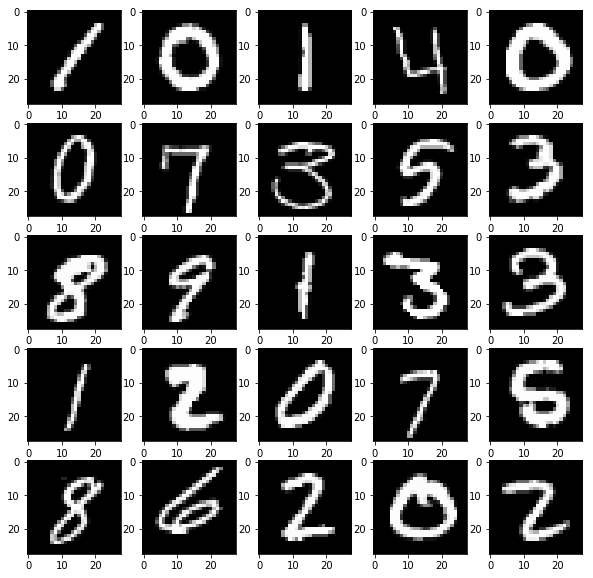

In [4]:
figure = plt.figure(figsize=(10, 10))
for i in range(25):
    curr_subplot = figure.add_subplot(5, 5, i + 1)
    curr_subplot.imshow(train_data[i].reshape((28, 28)), cmap='gray')

plt.show()

In [5]:
# Нормировка и центрирование данных
train_data = (train_data - mnist_data.mean()) / 255
validation_data = (validation_data - mnist_data.mean()) / 255

In [6]:
BATCH_SIZE = 100
N_EPOCHS = 15

In [7]:
# Разбиение на батчи
X_splited, Y_splited, n_batches = split_in_batches(train_data, train_labels, BATCH_SIZE)

Без регуляризации:

In [8]:
for GD_LEARNING_RATE in [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.5, 1]:
    session = tf.InteractiveSession()
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    W = tf.Variable(tf.zeros([784,10]), name='weights')
    b = tf.Variable(tf.zeros([10]), name='biases')
    session.run(tf.global_variables_initializer())
    y = tf.matmul(x,W) + b

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    )

    train_step = tf.train.GradientDescentOptimizer(GD_LEARNING_RATE).minimize(cross_entropy)

    X_splited, Y_splited, n_batches = split_in_batches(train_data, train_labels, BATCH_SIZE)

    for _ in range(N_EPOCHS):
        for i in range(n_batches):
            train_step.run(feed_dict={x: X_splited[i % n_batches], y_: Y_splited[i % n_batches]})
            
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    print("Learning rate:", GD_LEARNING_RATE)
    print("Accuracy on train:", accuracy.eval(feed_dict={x: train_data, y_: train_labels}))
    print("Accuracy on validation:", accuracy.eval(feed_dict={x: validation_data, y_: validation_labels}))
    print("---------------------------")
    session.close()

Learning rate: 1e-08
Accuracy on train: 0.736794
Accuracy on validation: 0.740259
---------------------------
Learning rate: 1e-06
Accuracy on train: 0.73693
Accuracy on validation: 0.740417
---------------------------
Learning rate: 0.0001
Accuracy on train: 0.754992
Accuracy on validation: 0.755972
---------------------------
Learning rate: 0.001
Accuracy on train: 0.838634
Accuracy on validation: 0.83914
---------------------------
Learning rate: 0.01
Accuracy on train: 0.893874
Accuracy on validation: 0.893024
---------------------------
Learning rate: 0.1
Accuracy on train: 0.921732
Accuracy on validation: 0.916197
---------------------------
Learning rate: 0.2
Accuracy on train: 0.927549
Accuracy on validation: 0.917864
---------------------------
Learning rate: 0.5
Accuracy on train: 0.930372
Accuracy on validation: 0.916038
---------------------------
Learning rate: 1
Accuracy on train: 0.926732
Accuracy on validation: 0.909293
---------------------------


Let's briefly touch on themes of regularization. As was discussed before, there are different approaches. We focus on the modification of loss function.

$$\arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) + \lambda_1 L_1(W) + \lambda_2 L_2(W)$$

1. $L_1(W) = sum_{i,j} |w_{i,j}|$ - sparsify weights (force to not use uncorrelated features)
2. $L_2(W) = sum_{i,j} w_{i,j}^2$ - minimize weights (force to not overfit)

#### Exercises
1. Train model again using both type of regularization.
2. Plot matrix of weights.
3. Which pixels have zero weights? What does it mean?
4. Have you improved accuracy on validation?

In [9]:
for L1_rate in [0, 1e-5, 1e-3]:
    for L2_rate in [0, 1e-5, 1e-3]:
        session = tf.InteractiveSession()
        x = tf.placeholder(tf.float32, shape=[None, 784])
        y_ = tf.placeholder(tf.float32, shape=[None, 10])

        W = tf.Variable(tf.zeros([784,10]), name='weights')
        b = tf.Variable(tf.zeros([10]), name='biases')
        session.run(tf.global_variables_initializer())
        y = tf.matmul(x,W) + b

        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
        )
        L1_penalty = tf.reduce_sum(tf.abs(W))
        L2_penalty = tf.reduce_sum(tf.square(W))

        cross_entr_L1_L2 = cross_entropy + L1_rate * L1_penalty + L2_rate * L2_penalty

        train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entr_L1_L2)

        for _ in range(N_EPOCHS):
            for i in range(n_batches):
                train_step.run(feed_dict={x: X_splited[i % n_batches], y_: Y_splited[i % n_batches]})

        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        if L1_rate == 0.001 and L2_rate == 0.001:
            model_with_L1_L2_weights = W.eval()
        
        print("L1 rate:", L1_rate, "| L2 rate:", L2_rate)
        print("Accuracy on train:", accuracy.eval(feed_dict={x: train_data, y_: train_labels}))
        print("Accuracy on validation:", accuracy.eval(feed_dict={x: validation_data, y_: validation_labels}))
        print("---------------------------")
        session.close()

L1 rate: 0 | L2 rate: 0
Accuracy on train: 0.930372
Accuracy on validation: 0.916038
---------------------------
L1 rate: 0 | L2 rate: 1e-05
Accuracy on train: 0.930066
Accuracy on validation: 0.915562
---------------------------
L1 rate: 0 | L2 rate: 0.001
Accuracy on train: 0.913398
Accuracy on validation: 0.907706
---------------------------
L1 rate: 1e-05 | L2 rate: 0
Accuracy on train: 0.929964
Accuracy on validation: 0.915562
---------------------------
L1 rate: 1e-05 | L2 rate: 1e-05
Accuracy on train: 0.929726
Accuracy on validation: 0.915721
---------------------------
L1 rate: 1e-05 | L2 rate: 0.001
Accuracy on train: 0.91333
Accuracy on validation: 0.907706
---------------------------
L1 rate: 0.001 | L2 rate: 0
Accuracy on train: 0.896391
Accuracy on validation: 0.892151
---------------------------
L1 rate: 0.001 | L2 rate: 1e-05
Accuracy on train: 0.896153
Accuracy on validation: 0.891834
---------------------------
L1 rate: 0.001 | L2 rate: 0.001
Accuracy on train: 0.8903

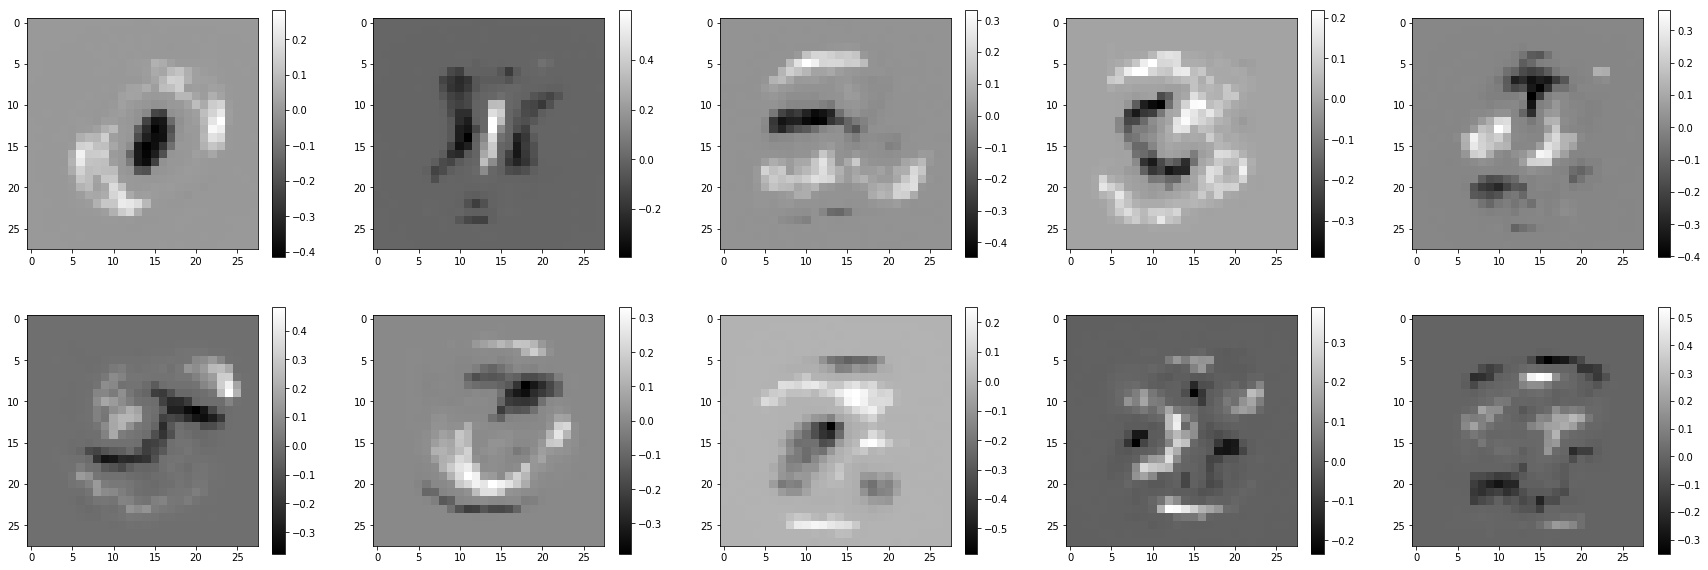

In [10]:
figure = plt.figure(figsize=(30, 10))
for i in range(10):
    curr_subplot = figure.add_subplot(2, 5, i + 1)
    plt.imshow(model_with_L1_L2_weights[:, i].reshape((28, 28)), cmap='gray')
    plt.colorbar()
    
plt.show()

Серым цветом отображаются пиксели с нулевым весом. Они такого цвета, потому что не несут никакой информации. Почти на всех картинках крайние пиксели не закрашены, поэтому никакой дополнительной информации, позволяющей классифицировать изображение, они не несут.

Регуляризация не помогла улучшить качество. Модель слишком простая и поэтому ей сложно переобучиться (а значит и регуляризация здесь не нужна)

### 2. Universal approximation theorem

What if we add more layers to our model? Namely, we train two matrix $W_2$ and $W_1$
$$softmax(W_2\cdot(W_1x)).$$

At first glance adding more parameters helps to increase the generalizing ability of the model. Buy actually we have the same model $softmax(Wx)$, where $W = W_2\cdot W_1$. But everyting changes with adding ome more layer. Let's add nonlinear function $\sigma$ between $W_2$ and $W_1$

$$softmax(W_2\cdot \sigma(W_1x)).$$

Kurt Hornik showed in 1991 that it is not the specific choice of the nonlinear function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear. For notational convenience, only the single output case will be shown. The general case can easily be deduced from the single output case.

Let $\sigma(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function.
Let $\mathcal{S}_m \subset \mathbb{R}^m$ denote any compact set. 
Then, given any $\varepsilon > 0$ and any coninuous function $f$ on $\mathcal{S}_m$, there exist an integer $N$ and real constants $v_i$, $b_i$ amd real vectors $w_i$ that

$$\left| \sum _{i=1}^{N}v_{i}\sigma \left( w_i^{T} x+b_i \right) - f(x) \right| < \varepsilon, ~~~ \forall x \in \mathcal{S}_m.$$

The theorem has non-constructive proof, it meams that no estimates for $N$ and no method to find approximation's parameters.

#### Exercises
1. Let $\sigma$ – [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) and $x \in \{0, 1\}^2$. Prove that $y = \sigma(wx + b)$ can approximate boolean function **OR** (hint: use constructive proof).
2. What about **AND** function?
3. Is it possible to implement **XOR**? Prove your words.
4. Prove that 2-layer network can implement any boolean function.

#### More useful facts:
1. A 2-layer network in in $\mathbb{R}^n$ allows to define convex polyhedron..
2. A 3-layer network in в $\mathbb{R}^n$ allows to define a not necessarily convex and not even necessarily connected area.

### 3. Backpropagation
Backpropagation is a method used to calculate the error contribution of each layer after a batch of data. It is a special case of an older and more general technique called automatic differentiation. In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of layers by calculating the gradient of the loss function. This technique is also sometimes called backward propagation of errors, because the error is calculated at the output and distributed back through the network layers. The main motivation of method is simplify evaluation of gradient which is complex problem for multilayer nets.

We need the following notation. Let $(y^1,\dots,y^n) = f(x^1,\dots,x^n)$ is some differentiable function and $\frac{dy}{dx}$ is matrix
$$\frac{dy}{dx} = \Big[ J_{ij} = \frac{\partial y^i}{\partial x^j} \Big]$$

Without violating the generality, we can assume that each layer is a function $x_{i} = f(x_{i-1}, w_i)$. As last layer we add loss function, so we can assume our multi-layer net as function $Q(x_0) = Q(f_n(f_{n-1}(\dots, w_{n-1}), w_n))$.

#### Forward step
Propagation forward through the network to generate the output values. Calculation of the loss function.

#### Backward step
Let's look at last layer. We can simply find $\frac{dQ}{dx_n}$. Now we can evaluate 

$$\frac{dQ}{dw_n} = \frac{dQ}{dx_n}\frac{dx_n}{dw_n} \text{ and } \frac{dQ}{dx_{n-1}} = \frac{dQ}{dx_n}\frac{dx_n}{dx_{n-1}}$$

Now we need calculate $\frac{dQ}{dw_{n-2}}$ и $\frac{dQ}{dx_{n-2}}$. But we have the same situation. We know $\frac{dQ}{dx_k}$, so can evaluate $\frac{dQ}{dw_k}$ and $\frac{dQ}{dx_{k-1}}$. Repeating this operation we find all the gradients. Now it's only remains to make a gradient step to update weights.

#### Exercises
1. Read more about [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
2. Train 2 layer net. Use sigmoid as nonlinearity.
3. Check accuracy on validation set.
4. Use [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) or LeakyReLu as nonlinearity. Compare accuracy and convergence with previous model.
5. Play with different architectures (add more layers, regularization and etc).
6. Show your best model.
7. How does quality change with adding layers. Prove your words, train model for 2, 3, 5, 7 and 10 layers.
8. Using backpropagation find optimal  digit 8 for your net.*

In [12]:
def mnist_multilayer_net(
    X_batches, 
    Y_batches, 
    learning_rate, 
    nonlinearity, 
    layers_shapes, 
    n_epochs,
    L1_rates,
    L2_rates
):
    session = tf.InteractiveSession()
    
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    n_inputs = 784
    n_batches = len(X_batches)
    layers_shapes = [n_inputs] + layers_shapes
    # Weights
    weights = []
    for i in range(1, len(layers_shapes)):
        weights.append(tf.Variable(tf.random_normal([layers_shapes[i - 1], layers_shapes[i]], stddev=1./n_inputs)))
    # Biases
    biases = []
    for i in range(1, len(layers_shapes)):
        biases.append(tf.Variable(tf.random_normal([layers_shapes[i]], stddev=1./n_inputs)))
    # Layers
    layers = []
    if (nonlinearity == 'ReLu'):
        layers.append(tf.nn.relu(tf.add(tf.matmul(x, weights[0]), biases[0])))
        for i in range(1, len(layers_shapes) - 2):
            layers.append(tf.nn.relu(tf.add(tf.matmul(layers[-1], weights[i]), biases[i])))
        out_layer = tf.add(tf.matmul(layers[-1], weights[-1]), biases[-1])
    elif (nonlinearity == 'Sigmoid'):
        layers.append(tf.nn.relu(tf.add(tf.matmul(x, weights[0]), biases[0])))
        for i in range(1, len(layers_shapes) - 2):
            layers.append(tf.sigmoid(tf.add(tf.matmul(layers[-1], weights[i]), biases[i])))
        out_layer = tf.add(tf.matmul(layers[-1], weights[-1]), biases[-1])
    else:
        print('Wrong nonlinearity')
        return
    
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out_layer)
    )
    
    for i in range(len(L1_rates)):
        cross_entropy += L1_rates[i] * tf.reduce_sum(tf.abs(weights[i]))
        cross_entropy += L2_rates[i] * tf.reduce_sum(tf.square(weights[i]))

    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(out_layer,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    accuracy_train = []
    accuracy_validation = []
    session.run(tf.global_variables_initializer())
    for _ in range(n_epochs):
        for i in range(n_batches):
            train_step.run(feed_dict={x: X_batches[i], y_: Y_batches[i]})
        accuracy_train.append(accuracy.eval(feed_dict={x: train_data, y_: train_labels}))
        accuracy_validation.append(accuracy.eval(feed_dict={x: validation_data, y_: validation_labels}))
    
    weights_to_return = []
    biases_to_return = []
    for i in range(len(weights)):
        weights_to_return.append(weights[i].eval())
        biases_to_return.append(biases[i].eval())
    session.close()
    return accuracy_train, accuracy_validation, weights_to_return, biases_to_return

Двухслойная сеть с использованием сигмоиды:

In [32]:
accuracy_train_sigm, accuracy_validation_sigm, _, _ = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.002,
    'Sigmoid',
    [450, 10],
    50,
    [0, 0],
    [0, 0]
)

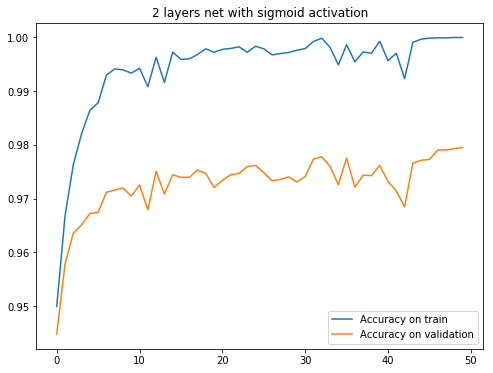

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(accuracy_train_sigm, label='Accuracy on train')
plt.plot(accuracy_validation_sigm, label='Accuracy on validation')
plt.title('2 layers net with sigmoid activation')
plt.legend()
plt.show()

Двухслойная сеть с использованием ReLu:

In [34]:
accuracy_train_relu, accuracy_validation_relu, _, _ = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.002,
    'ReLu',
    [450, 10],
    50,
    [0, 0],
    [0, 0]
)

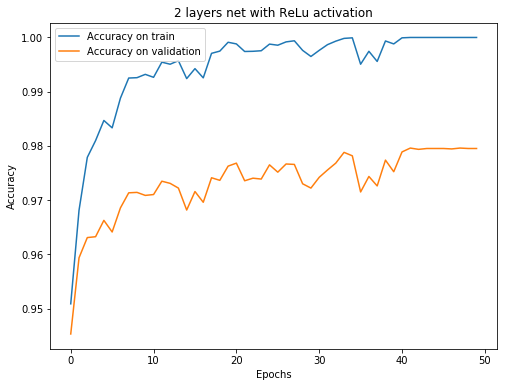

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(accuracy_train_relu, label='Accuracy on train')
plt.plot(accuracy_validation_relu, label='Accuracy on validation')
plt.title('2 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Двухслойная

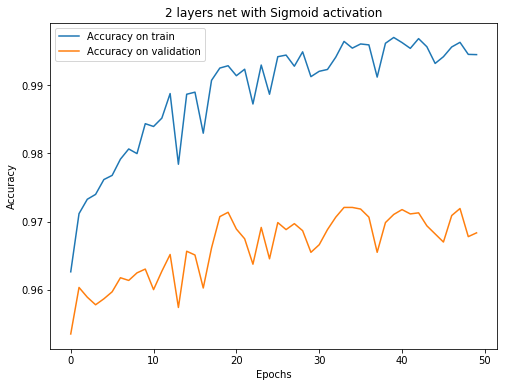

In [13]:
sigm2_acc_train, sigm2_acc_validation, _, _ = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.01,
    'Sigmoid',
    [350, 10],
    50,
    [0, 0],
    [0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(sigm2_acc_train, label='Accuracy on train')
plt.plot(sigm2_acc_validation, label='Accuracy on validation')
plt.title('2 layers net with Sigmoid activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

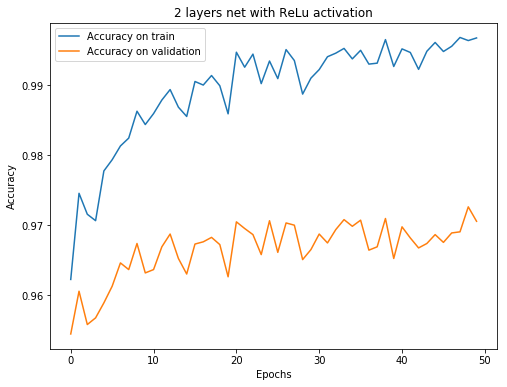

In [15]:
relu2_acc_train, relu2_acc_validation, _, _ = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.01,
    'ReLu',
    [350, 10],
    50,
    [0, 0],
    [0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(relu2_acc_train, label='Accuracy on train')
plt.plot(relu2_acc_validation, label='Accuracy on validation')
plt.title('2 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Трехслойная:

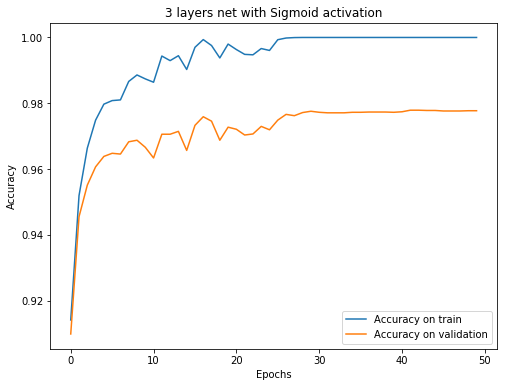

In [40]:
sigm3_acc_train, sigm3_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.001,
    'Sigmoid',
    [350, 350, 10],
    50,
    [0, 0, 0],
    [0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(sigm3_acc_train, label='Accuracy on train')
plt.plot(sigm3_acc_validation, label='Accuracy on validation')
plt.title('3 layers net with Sigmoid activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

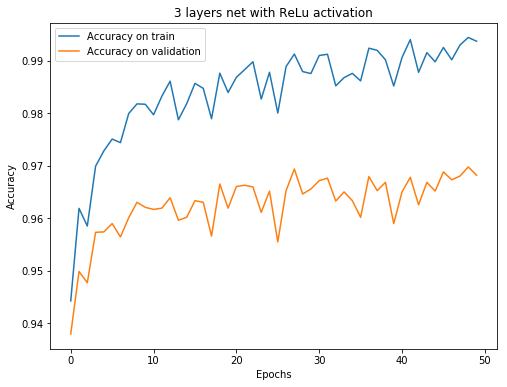

In [38]:
relu3_acc_train, relu3_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.01,
    'ReLu',
    [350, 350, 10],
    50,
    [0, 0, 0],
    [0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(relu3_acc_train, label='Accuracy on train')
plt.plot(relu3_acc_validation, label='Accuracy on validation')
plt.title('3 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Пятислойная:

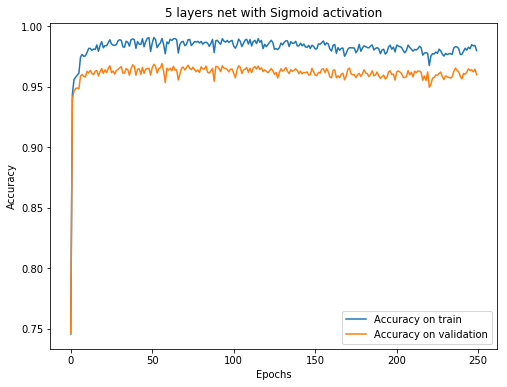

In [41]:
sigm5_acc_train, sigm5_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.01,
    'Sigmoid',
    [350, 350, 200, 150, 10],
    50,
    [0, 0, 0, 0],
    [0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(sigm5_acc_train, label='Accuracy on train')
plt.plot(sigm5_acc_validation, label='Accuracy on validation')
plt.title('5 layers net with Sigmoid activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

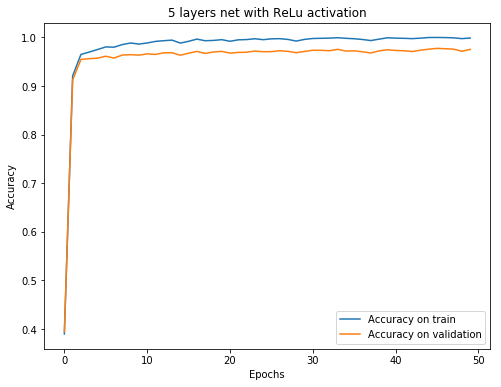

In [44]:
relu5_acc_train, relu5_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.001,
    'ReLu',
    [350, 350, 200, 150, 10],
    50,
    [0, 0, 0, 0],
    [0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(relu5_acc_train, label='Accuracy on train')
plt.plot(relu5_acc_validation, label='Accuracy on validation')
plt.title('5 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Семислойная:

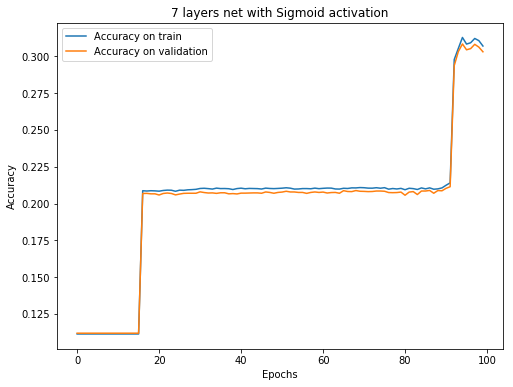

In [49]:
sigm7_acc_train, sigm7_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.0001,
    'Sigmoid',
    [350, 350, 200, 150, 150, 100, 10],
    100,
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(sigm7_acc_train, label='Accuracy on train')
plt.plot(sigm7_acc_validation, label='Accuracy on validation')
plt.title('7 layers net with Sigmoid activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

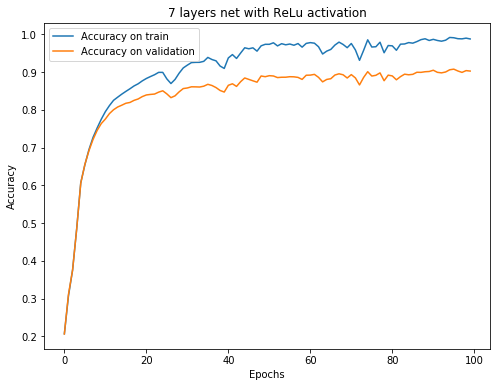

In [48]:
relu7_acc_train, relu7_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.0001,
    'ReLu',
    [350, 350, 200, 150, 150, 100, 10],
    100,
    [0, 0, 0, 0],
    [0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(relu7_acc_train, label='Accuracy on train')
plt.plot(relu7_acc_validation, label='Accuracy on validation')
plt.title('7 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Десятислойная:

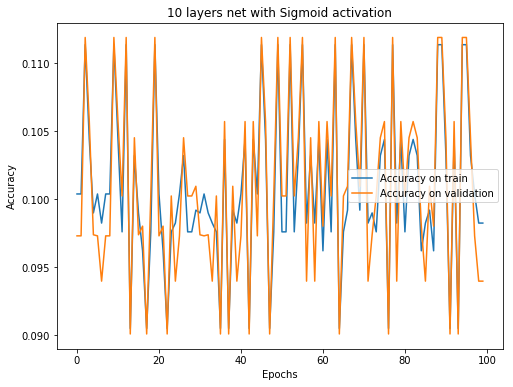

In [55]:
sigm10_acc_train, sigm10_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.00001,
    'Sigmoid',
    [350, 350, 250, 250, 250, 200, 200, 150, 150, 10],
    100,
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(sigm10_acc_train, label='Accuracy on train')
plt.plot(sigm10_acc_validation, label='Accuracy on validation')
plt.title('10 layers net with Sigmoid activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

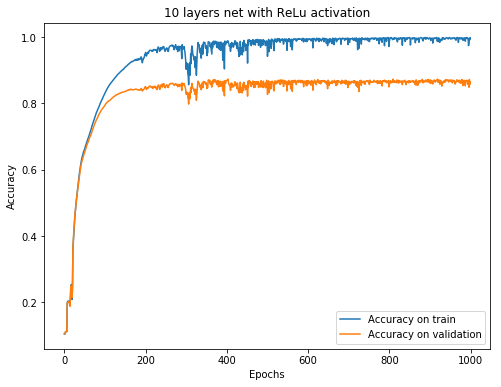

In [59]:
relu10_acc_train, relu10_acc_validation = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.00001,
    'ReLu',
    [350, 350, 250, 250, 250, 200, 200, 150, 150, 10],
    1000,
    [0, 0, 0, 0],
    [0, 0, 0, 0]
)

plt.figure(figsize=(8, 6))
plt.plot(relu10_acc_train, label='Accuracy on train')
plt.plot(relu10_acc_validation, label='Accuracy on validation')
plt.title('10 layers net with ReLu activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Далее в выводе не рассматриваю качество на обучении, так как всегда (кроме 10-ти слойных сетей) оно доходило до 1.

Выводы: нормально показала себя сеть с двумя слоями. Почти на всех значениях learning rate и при использовании обоих типов нелинейности(ReLu, Sigmoid) был достигнут результат 0.96 на валидации (при этом значения колебались в пределах 0.96-0.97). Самый лучший результат показала трехслойная сеть с использованием сигмоиды. Там была самая быстрая сходимость, и достигнут самый высокий результат на валидации(0.9777). Начиная с 5-ти слоёв начались проблемы: нужно было подбирать learning rate, так как далеко не на всех параметрах обучения сеть сходилась к какому-нибудь хорошему качеству. При подобранном learning rate 5-ти слойная сеть получила за 100 эпох качество 0.96. Может быть можно было подобрать learning rate, на котором достиглось бы качество 0.97. На семи слоях также потребовался подбор параметров обучения. За 100 эпох с сигмоидой сеть показала плохое качество (странные резкие скачки точности после продолжительного плато), с релу не получилось достичь качества 0.90 (мб стоило попробовать увеличить количество эпох). Десятислойные сети очень долго сходились и в итоге проиграли в качестве своим менее слоёным товарищам.

Лучшая модель:

In [16]:
best_model_acc_train, best_model_acc_validation, w, b = mnist_multilayer_net(
    X_splited,
    Y_splited,
    0.001,
    'Sigmoid',
    [650, 650, 10],
    50,
    [0, 0.00000, 0.000001],
    [0, 0.00000, 0.000001]
)
print(best_model_acc_validation[-1])

0.979049


Поиск лучшей восьмерки:

In [17]:
# Упаковываем полученные веса в один вектор
w = w + b
nw = w[0].reshape((784 * 650, ))
nw = np.concatenate((nw, w[1].reshape((650 * 650, ))))
nw = np.concatenate((nw, w[2].reshape((650 * 10, ))))
nw = np.concatenate((nw, w[3].reshape((650, ))))
nw = np.concatenate((nw, w[4].reshape((650, ))))
nw = np.concatenate((nw, w[5].reshape((10, ))))

eight = np.zeros((1, 10))
eight[0,8] = 1

In [18]:
%%time
session = tf.InteractiveSession()
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32, shape=[1, 10])

# Распаковываем веса
first_w = tf.reshape(x[:509600], (784, 650))
second_w = tf.reshape(x[509600:509600 + 422500], (650, 650))
third_w = tf.reshape(x[509600 + 422500:6500 + 509600 + 422500], (650, 10))
first_b = tf.reshape(x[6500 + 509600 + 422500:6500 + 509600 + 422500 + 650], (1, 650))
second_b = tf.reshape(x[6500 + 509600 + 422500 + 650: 6500 + 509600 + 422500 + 650 + 650], (1, 650))
third_b = tf.reshape(x[6500 + 509600 + 422500 + 650 + 650:], (1, 10))

# Инициализируем матрицу для картинки
W1 = tf.Variable(tf.random_normal([1, 784], stddev=1./784))

first = tf.sigmoid(tf.add(tf.matmul(W1, first_w), first_b))
                 
second = tf.sigmoid(tf.add(tf.matmul(first, second_w), second_b))

out_layer = tf.add(tf.matmul(second, third_w), third_b)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out_layer)
)

train_step = tf.train.GradientDescentOptimizer(2.5).minimize(cross_entropy)
session.run(tf.global_variables_initializer())
for _ in range(10):
    for i in range(n_batches):
        train_step.run(feed_dict={x: nw, y_: eight})
best_eight = W1.eval()
session.close()

CPU times: user 6.74 s, sys: 380 ms, total: 7.12 s
Wall time: 4.7 s


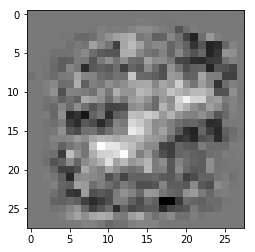

In [22]:
plt.imshow(best_eight.reshape((28, 28)), cmap='gray')
plt.show()

Не очень похоже на восьмерку, хотя классификатор очень уверен, что это цифра 8.

### 4. Autoencoders
An autoencoder is an network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Also, this technique can be used to train deep nets.

Architecturally, the simplest form of an autoencoder is a feedforward net very similar to the multilayer perceptron (MLP), but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs. Therefore, autoencoders are unsupervised learning models. An autoencoder always consists of two parts, the encoder and the decoder. Encoder returns latent representation of the object (compressed representation, usuallu smaller dimension), but decoder restores object from this latent representation. Autoencoders are also trained to minimise reconstruction errors (e.g. MSE).

Various techniques exist to prevent autoencoders from learning the identity and to improve their ability to capture important information:
1. Denoising autoencoder - take a partially corrupted input.
2. Sparse autoencoder - impose sparsity on the hidden units during training (whilst having a larger number of hidden units than inputs).
3. Variational autoencoder models inherit autoencoder architecture, but make strong assumptions concerning the distribution of latent variables.
4. Contractive autoencoder - add an explicit regularizer in objective function that forces the model to learn a function that is robust to slight variations of input values.

#### Exercises
1. Train 2 layers autoencoder that compressed mnist images to $\mathbb{R}^3$ space.
2. For each digit plot several samples in 3D axis (use "%matplotlib notebook" mode or plotly). How do digits group?
3. Train autoencoder with more layers. What are results?
4. Use autoencoder to pretrain 2 layers (unsupervised) and then train the following layers with supervised method.

1 + 1

In [44]:
%%time
session = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])

n_inputs = 784
n_outputs = 784
compressed_size = 3
# Weights
W1 = tf.Variable(tf.random_normal([n_inputs, compressed_size], stddev=1./784))
W2 = tf.Variable(tf.random_normal([compressed_size, n_outputs], stddev=1./784))

# Biases
b1 = tf.Variable(tf.random_normal([compressed_size], stddev=1./784))
b2 = tf.Variable(tf.random_normal([n_outputs], stddev=1./784))

layer_1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))
out_layer = tf.add(tf.matmul(layer_1, W2), b2)

MSE = tf.reduce_mean(
    tf.losses.mean_squared_error(labels=x, predictions=out_layer)
)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(MSE)

session.run(tf.global_variables_initializer())
for _ in range(50):
    for i in range(n_batches):
        train_step.run(feed_dict={x: X_splited[i]})
        
weights_to_compress = W1.eval()
biases_to_compress = b1.eval()
session.close()

CPU times: user 22 s, sys: 1.42 s, total: 23.4 s
Wall time: 12.8 s


<IPython.core.display.Javascript object>


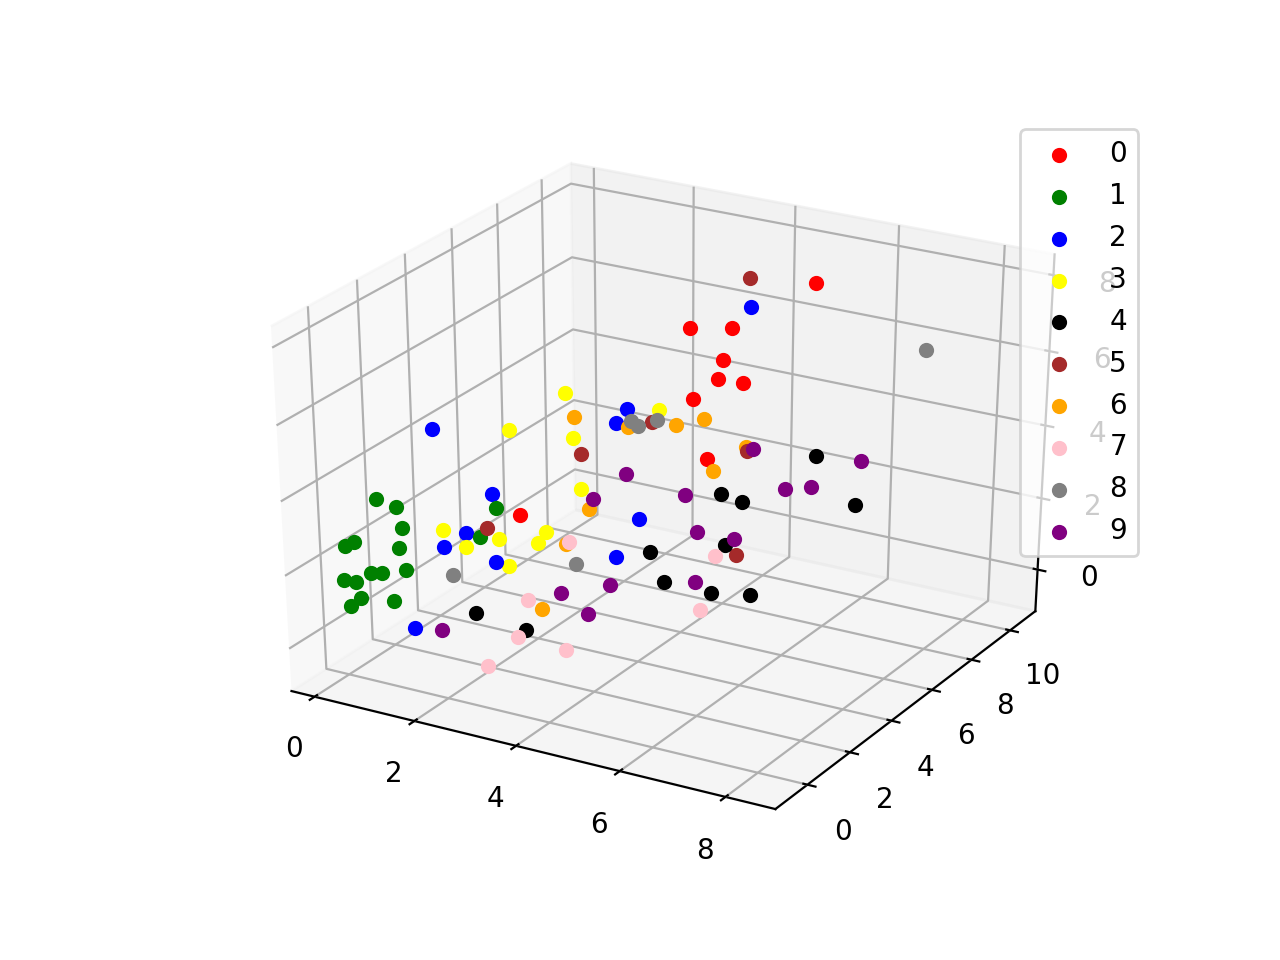

In [47]:
%matplotlib notebook
X_to_plot = X_splited[0]
X_compressed = np.dot(X_to_plot, weights_to_compress) + biases_to_compress

color_map = ['red', 'green', 'blue', 'yellow', 'black', 'brown', 'orange', 'pink', 'grey', 'purple']
digit_labels_to_plot = []
for i in range(len(Y_splited[0])):
    for j in range(10):
        if (Y_splited[0][i, j] == 1):
            digit_labels_to_plot.append(color_map[j])
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

was_in_legend = [False] * 10
for i in range(10):
    for j in range(100):
        if Y_splited[0][j, i] == 1:
            if not was_in_legend[i]:
                was_in_legend[i] = True
                ax.scatter(
                    X_compressed[j, 0], 
                    X_compressed[j, 1], 
                    X_compressed[j, 2], 
                    c=digit_labels_to_plot[j], 
                    label=str(i)
                )
            else:
                ax.scatter(
                    X_compressed[j, 0], 
                    X_compressed[j, 1], 
                    X_compressed[j, 2], 
                    c=digit_labels_to_plot[j]
                )
ax.legend()
plt.show()

Цифры расположились в соотвествии с тем, как их пишут. Т.е. похожие на письме цифры находятся радом друг с другом.

2 рядом с 7, 9 рядом с 5, 0 отдельно от всех(?), 4 рядом с 9, 8 рядом с 6

Сравним качество с использованием двух слоёв для сжатия и одного слоя:

In [55]:
%%time
X_splited_compressed = np.dot(X_splited, weights_to_compress) + biases_to_compress
session = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

n_inputs = 3
n_neurons_layer1 = 100
n_outputs = 10
# Weights
W1 = tf.Variable(tf.random_normal([n_inputs, n_neurons_layer1], stddev=1./784))
W2 = tf.Variable(tf.random_normal([n_neurons_layer1, n_outputs], stddev=1./784))

# Biases
b1 = tf.Variable(tf.random_normal([n_neurons_layer1], stddev=1./784))
b2 = tf.Variable(tf.random_normal([n_outputs], stddev=1./784))

layer_1 = tf.sigmoid(tf.add(tf.matmul(x, W1), b1))

out_layer = tf.add(tf.matmul(layer_1, W2), b2)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out_layer)
)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(out_layer,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

session.run(tf.global_variables_initializer())
for _ in range(150):
    for i in range(n_batches):
        train_step.run(feed_dict={x: X_splited_compressed[i], y_: Y_splited[i]})
        
print("Accuracy on train with 1 compressing layer:", accuracy.eval(
    feed_dict={x: np.dot(train_data, weights_to_compress) + biases_to_compress, 
               y_: train_labels
              })
     )
print("Accuracy on validation with 1 compressing layer:", accuracy.eval(
    feed_dict={x: np.dot(validation_data, weights_to_compress) + biases_to_compress, 
               y_: validation_labels
              })
     )
session.close()

Accuracy on train with 1 compressing layer: 0.49852
Accuracy on validation with 1 compressing layer: 0.501151
CPU times: user 1min 1s, sys: 4.79 s, total: 1min 5s
Wall time: 32 s


2 + 2

In [23]:
%%time
session = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])

n_inputs = 784
n_median_neurons = 400
n_outputs = 784
compressed_size = 3
# Weights
W1 = tf.Variable(tf.random_normal([n_inputs, n_median_neurons], stddev=1./784))
W2 = tf.Variable(tf.random_normal([n_median_neurons, compressed_size], stddev=1./784))
W3 = tf.Variable(tf.random_normal([compressed_size, n_median_neurons], stddev=1./784))
W4 = tf.Variable(tf.random_normal([n_median_neurons, n_inputs], stddev=1./784))

# Biases
b1 = tf.Variable(tf.random_normal([n_median_neurons], stddev=1./784))
b2 = tf.Variable(tf.random_normal([compressed_size], stddev=1./784))
b3 = tf.Variable(tf.random_normal([n_median_neurons], stddev=1./784))
b4 = tf.Variable(tf.random_normal([n_inputs], stddev=1./784))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, W1), b1))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, W2), b2))
layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, W3), b3))
out_layer = tf.add(tf.matmul(layer_3, W4), b4)

MSE = tf.reduce_mean(
    tf.losses.mean_squared_error(labels=x, predictions=out_layer)
)

train_step = tf.train.AdamOptimizer(0.001).minimize(MSE)

session.run(tf.global_variables_initializer())
for _ in range(50):
    for i in range(n_batches):
        train_step.run(feed_dict={x: X_splited[i]})
        
weights_to_compress1 = W1.eval()
weights_to_compress2 = W2.eval()
biases_to_compress1 = b1.eval()
biases_to_compress2 = b2.eval()
session.close()

CPU times: user 27.2 s, sys: 1.55 s, total: 28.7 s
Wall time: 17.4 s


In [26]:
def compress_image(matrix):
    session = tf.InteractiveSession()
    matrix = np.dot(matrix, weights_to_compress1) + biases_to_compress1
    matrix = np.dot(tf.nn.sigmoid(matrix).eval(), weights_to_compress2) + biases_to_compress2
    session.close()
    return matrix

In [27]:
X_splited_compressed2 = compress_image(X_splited)

In [28]:
%%time
session = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

n_inputs = 3
n_neurons_layer1 = 100
n_outputs = 10
# Weights
W1 = tf.Variable(tf.random_normal([n_inputs, n_neurons_layer1], stddev=1./784))
W2 = tf.Variable(tf.random_normal([n_neurons_layer1, n_outputs], stddev=1./784))

# Biases
b1 = tf.Variable(tf.random_normal([n_neurons_layer1], stddev=1./784))
b2 = tf.Variable(tf.random_normal([n_outputs], stddev=1./784))

layer_1 = tf.sigmoid(tf.add(tf.matmul(x, W1), b1))

out_layer = tf.add(tf.matmul(layer_1, W2), b2)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out_layer)
)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(out_layer,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

session.run(tf.global_variables_initializer())
for _ in range(150):
    for i in range(n_batches):
        train_step.run(feed_dict={x: X_splited_compressed2[i], y_: Y_splited[i]})
        
print("Accuracy on train with 2 compressing layers:", 
      accuracy.eval(feed_dict={x: compress_image(train_data), y_: train_labels})
     )
print("Accuracy on validation with 2 compressing layers:", 
      accuracy.eval(feed_dict={x: compress_image(validation_data), y_: validation_labels})
     )
session.close()

Accuracy on train with 2 compressing layers: 0.715024
Accuracy on validation with 2 compressing layers: 0.703516
CPU times: user 1min 7s, sys: 5.64 s, total: 1min 13s
Wall time: 35.3 s


При использовании одного слоя получили качество ~0.5, при использовании трёх слоёв качество как на обучениии, так и на валидации было ~0.70.
